In [4]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
import random

In [3]:
def z_score(sample_mean, sample_size, pop_mean, pop_std):
    num = sample_mean - pop_mean
    deno = pop_std / sample_size ** 0.5
    return num/ deno


$
Step\ 1:\\
Null\ Hypothesis(Status\ Quo):H_o\ \geq\ 100\ ms\\
Alternate\ Hypothesis(Bold\ claim):H_1\ <\ 100\ ms\\
$

$
Step\ 2:\\
Collect\ a\ Sample\ of\ size\ n\ =\ 20\\
$
$$
Sample = [82,\  66,\ 145,\ 148,\ 142,\ 136,\ 149,\ 136,\ 112,\ 135,\  73,\  71,\  93,\
         87,\ 138,\ 144,\  74,\  68,\  88,\ 118]\\
$$
$
Calculate\ the\ mean(\overline{X})\ of\ the\ sample.\
$

In [63]:
Samples = [82,  66, 125, 118, 122, 126, 129, 120, 112, 103,  73,  79,  93,
         87, 116, 104,  74,  68,  88, 118]
n = 100
sample_mean = 97.5
print("sample-mean:", sample_mean)

sample-mean: 97.5


$
Step\ 3:\
Compute\ Test\ Statistics.\\
Use\ "z-score"\ if\ Standard\ Deviation(\sigma)\ is\ given\\
$
$$
z-score\ =\  \frac{\overline{X}-\mu_{\overline{X}}}{\frac{\sigma}{\sqrt{n}}} \\
$$
$
Else\ use\ "t-score"\ if\ Standard\ Deviation(\sigma)\ is\ not\ given\:\
$
$$
t-score\ =\ \frac{\overline{X}-\mu_{\overline{X}}}{\frac{S}{\sqrt{n}}}\\
$$
$$
where, S\ =\ Sample\ Standard\ Deviation\\
S = \sqrt{\frac{\sum_{i=0}^{n}(Obs-\overline{X})^2}{n-1}}\\
\mu_{\overline{X}}\ =\ 100\ =\ Population\ mean\\
$$

In [64]:
SD = 7
#np.sqrt(sum((i-sample_mean)**2 for i in Samples)/ (n-1))
print("SD:", SD)
pop_mean = 
SE = SD / n ** 0.5
print("SE:", SE)

SD: 7
SE: 0.7


$Since\ we\ don't\ have\ \sigma\ given\ we\ will\ go\ for\ t-score\$

In [65]:
t_score = z_score(sample_mean, n, pop_mean, SD)
print("t-score:", t_score)

t-score: -3.5714285714285716


$
Step\ 4:\\ 
Decide\ the\ value\ of\ significance\ level(\alpha)\\
If\ confidence\ level\ is\ taken\ as\ 95\%\ =\ 0.95 \\
then, \\
$
$$
1\ -\ \alpha\ =\ 0.95\\
\alpha\ =\ 0.05\\
$$

In [66]:
confidence_level = 0.95
alpha = 1 - confidence_level
alpha = 0.05

In [75]:
t_critical = t.ppf(1.0 - alpha, df = 99)
print("t_critical:", t_critical)

t_critical: 1.6603911559963895


$
Step\ 5.1:\
    Apply\ decision\ rule\\
    For\ Bold\ Claim\ H_o\ <\ 100\ ms\ we\ consider\ left\ tailed\ t-test.\\
$    

Text(100.15, 0.05, 'x_bar')

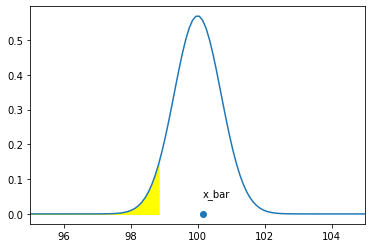

In [86]:
mn = 95
mx = 105

Mean = pop_mean
std = SD / n ** 0.5

x = np.linspace(mn, mx, 100)
y = norm.pdf(x, Mean, std)
plt.xlim(mn, mx)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(mn, t_critical_left, 100)
y1 = norm.pdf(x1, Mean, std)
plt.fill_between(x1, y1, color = "yellow")

plt.scatter(mean, 0)
plt.annotate("x_bar", (mean, 0.05))

$
Step\ 5.2:\ Calculate\ p-value\ and\ get\ the\ conclusion\\ 
$

$Conclusion\ using\ t-test\$

In [80]:
if (t_score < t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


$Conclusion\ using\ p-value\$

In [81]:
p_value = 1.0 -norm.cdf(np.abs(t_score))
print("p-value:", p_value)

if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p-value: 0.00017751969037349546
Reject Null Hypothesis
